Populating the interactive namespace from numpy and matplotlib


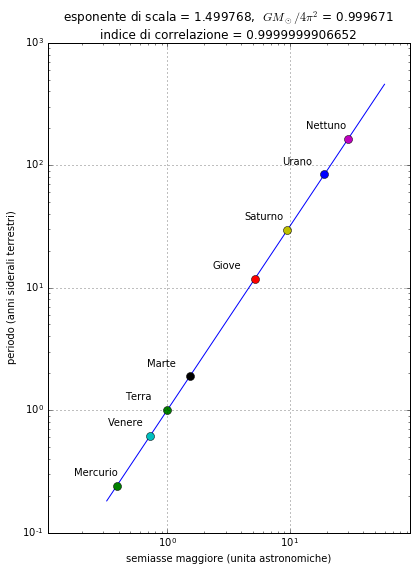

In [12]:
# Verifica della terza legge di Keplero: (periodo orbitale)**2 ~ (semiasse maggiore dell'orbita)**3
# La legge di scala è verificata riportando i dati in un grafico log-log
# Parametri orbitali:
# - distanza del pianeta dal Sole (unità astronomiche = distanza media tra Terra e Sole = 149 597 871 km)
# - periodo di rivoluzione (anni siderali terrestri)
# http://www.astronomynotes.com/tables/tablesb.htm

%pylab inline

d=23.9344696       # giorno siderale (h)
y=365.256363004    # giorni siderali / anno siderale

par={                                                   # parametri orbitali (semiasse maggiore, periodo)
'Mercurio' : ( 0.387 ,  87.969 / y ),
'Venere'   : ( 0.723 , 224.701 / y ), 
'Terra'    : ( 1.000 ,       y / y ) ,
'Marte'    : ( 1.524 , 686.98  / y ),
'Giove'    : ( 5.203 ,  11.862     ),
'Saturno'  : ( 9.537 ,  29.457     ),
'Urano'    : (19.191 ,  84.011     ),
'Nettuno'  : (30.069 , 164.79      )
}

from scipy.stats import linregress                       # importo il metodo dei minimi quadrati
vals=log(array(par.values()))                            # prendo i logaritmi dei parametri orbitali
m,q,r,p,s=linregress(vals)                               # minimi quadrati
                                                         # m = coefficiente angolare, q =  termine noto
                                                         # r = coefficiente di correlazione (misura la bontà del fit)
        
fig=figure(figsize=(6,8))                                # creo una figura

x=linspace(vals[:,0].min()*1.2,vals[:,0].max()*1.2)      # creo un vettore di valori possibili dei log dei semiassi maggiori
plot(exp(x),exp(m*x+q))                                  # disegno la retta interpolante
for key in par:                                          # disegno i punti sperimentali 
    x=par[key][0]                                        # semiasse maggiore
    y=par[key][1]                                        # periodo
    loglog(x,y,'o',markersize=8)                         # grafico doppio logaritmico
    text(0.45*x,1.2*y,key)                                # aggiungo una legenda per identificare i pianeti
    
xlabel('semiasse maggiore (unita astronomiche)')
ylabel('periodo (anni siderali terrestri)')
title('esponente di scala = %f,  $GM_\odot/4\pi^2$ = %g\nindice di correlazione = %.13f'%(m,exp(-2*q),r))
axis('equal')                                            # utilizzo la stessa unità di misura su ascisse e ordinate
grid()
fig.tight_layout()
